In [8]:
import matplotlib.pyplot as plt
import matplotlib
import mpld3
import numpy as np
import pandas as pd
from sympy import Eq, Symbol, solve

%matplotlib inline

In [9]:
import astropy.units as u
from astropy.constants import G, c, M_jup, M_sun, m_e, k_B, h, N_A, m_p, hbar, eps0, sigma_sb, e, mu0, R_earth, R_sun

In [5]:
#1b
@u.quantity_input(t=u.s)
def L(t):
    return 2e5*u.solLum*(((M_sun/(0.1*u.solMass))**5.-5*2e5*u.solLum/M_sun/(0.007*c**2)*t)**(-6./5)).decompose()

@u.quantity_input(t=u.s)
def R(t):
    return 3700*u.solRad*(((M_sun/(0.1*u.solMass))**5.-5*2e5*u.solLum/M_sun/(0.007*c**2)*t)**(-4./5)).decompose()

In [6]:
t_final=0.2*(1./(0.1*u.solMass)**5.-1./(0.45*u.solMass)**5)*M_sun**6*0.007*c**2/(2e5*u.solLum)
t_final.decompose().to(u.Myr)

/Users/taweewat/anaconda/lib/python2.7/site-packages/IPython/core/formatters.py:92: DeprecationWarning: DisplayFormatter._ipython_display_formatter_default is deprecated: use @default decorator instead.
  def _ipython_display_formatter_default(self):
/Users/taweewat/anaconda/lib/python2.7/site-packages/IPython/core/formatters.py:669: DeprecationWarning: PlainTextFormatter._singleton_printers_default is deprecated: use @default decorator instead.
  def _singleton_printers_default(self):


<Quantity 10304.985817166264 Myr>

In [7]:
t=np.logspace(1.0,np.log10(10304.),100)*u.Myr

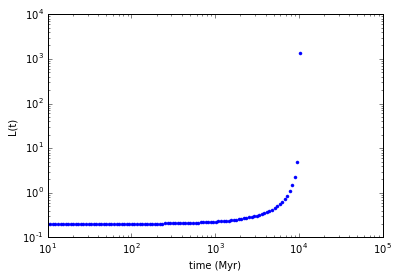

In [147]:
plt.plot(t,L(t),'.')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('time (Myr)')
plt.ylabel('L(t)')

In [7]:
L(t)

<Quantity [  2.00233019e-01,  2.00249954e-01,  2.00268121e-01,
             2.00287610e-01,  2.00308517e-01,  2.00330947e-01,
             2.00355010e-01,  2.00380826e-01,  2.00408523e-01,
             2.00438237e-01,  2.00470118e-01,  2.00504324e-01,
             2.00541024e-01,  2.00580403e-01,  2.00622655e-01,
             2.00667993e-01,  2.00716643e-01,  2.00768849e-01,
             2.00824872e-01,  2.00884993e-01,  2.00949516e-01,
             2.01018764e-01,  2.01093089e-01,  2.01172864e-01,
             2.01258495e-01,  2.01350416e-01,  2.01449096e-01,
             2.01555038e-01,  2.01668784e-01,  2.01790917e-01,
             2.01922068e-01,  2.02062912e-01,  2.02214181e-01,
             2.02376662e-01,  2.02551203e-01,  2.02738722e-01,
             2.02940208e-01,  2.03156728e-01,  2.03389436e-01,
             2.03639581e-01,  2.03908513e-01,  2.04197690e-01,
             2.04508697e-01,  2.04843247e-01,  2.05203199e-01,
             2.05590571e-01,  2.06007556e-01,  2.064565

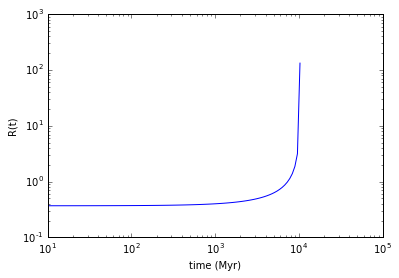

In [148]:
plt.plot(t,R(t))
plt.xscale('log')
plt.yscale('log')
plt.xlabel('time (Myr)')
plt.ylabel('R(t)')

In [153]:
Teff=(L(t)/(4*np.pi*R(t)**2*sigma_sb))**0.25
Teff0=Teff.decompose()

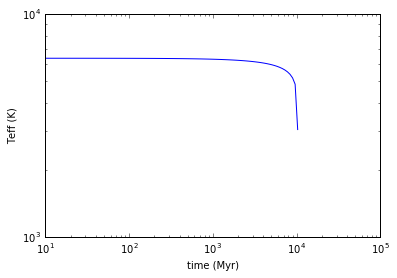

In [154]:
plt.plot(t,Teff0)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('time (Myr)')
plt.ylabel('Teff (K)')

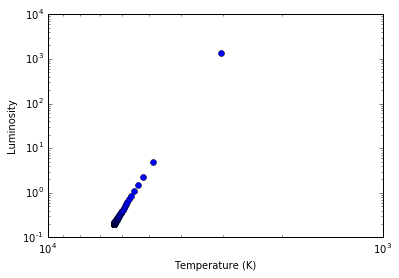

In [157]:
plt.plot(Teff0,L(t),'o')
plt.xscale('log')
plt.yscale('log')
plt.xlim(1e4,1e3)
plt.xlabel('Temperature (K)')
plt.ylabel('Luminosity')

In [196]:
#2a
rho0=2e5*u.g/u.cm**3
T0=1.5e8*u.K

def e3(T):
    T9=T/(1e9*u.K)
    e3=5.1e8*u.erg/u.g/u.s*(rho0/(1.*u.g/u.cm**3))**2/T9**3*np.e**(-4.4027/T9)
    return e3

x=(rho0/(2e6*u.g/u.cm**3))**(1/3.)
cve=(1.35e5/(rho0/(1.*u.g/u.cm**3))*T0/(1*u.K)*x*(1+x**2)**0.5)*u.erg/u.g/u.K
cvH=3.*k_B/(4*m_p)
cv=cve+cvH
print cv.decompose()

def DeltaT(t,T):
    return e3(T)*t/cv

11371.9842394 m2 / (K s2)


In [197]:
Tf=((rho0/(1e-8*u.g/u.cm**3))**(2./3))*u.K
print rho0, Tf
#DeltaT(1*u.year,T0).decompose()

200000.0 g / cm3 736806299.728 K


In [227]:
Ts=[]
ts=[]
T=T0
dt=0.01*u.hr
t=0.*u.hr
while T<=Tf:
    T=T+DeltaT(dt,T)
    t=t+dt
    Ts.append(T.value)
    ts.append(t.value)

ts=np.array(ts)*u.hr
Ts=np.array(Ts)*u.K
print Ts[-1]
print Tf

30228957029.1 K
736806299.728 K


736806299.728 K 666865840.949 K 7.5675 d


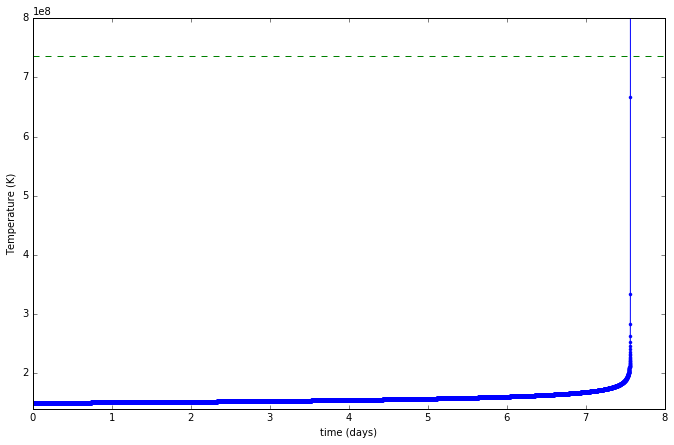

In [228]:
s=7
fig=plt.subplots(figsize=(1.61803398875*s,s))
print Tf, Ts[-2], ts[-2].to(u.day)
plt.plot(ts.to(u.day),Ts,'.-')
plt.plot([0,8],[1,1]*Tf,'--')
plt.ylim(1.4e8,0.8e9)
#plt.xscale('log')
#plt.yscale('log')
plt.xlabel('time (days)')
plt.ylabel('Temperature (K)')

In [21]:
Ts=[]
ts=[]
T=T0
dt=0.05*u.hr
t=0.*u.hr
while T<Tf:
    Ts.append(T.value)
    ts.append(t.value)
    T=T+DeltaT(dt,T)
    t=t+dt

ts=np.array(ts)*u.hr
Ts=np.array(Ts)*u.K

In [22]:
x=[]
Tss=Ts/u.K
for i, T in enumerate(Tss[1:]):
     x.append((Tss[i]-Tss[i-1])/(dt/u.hr))
x=np.array(x)

(-0.1, 130000.0)

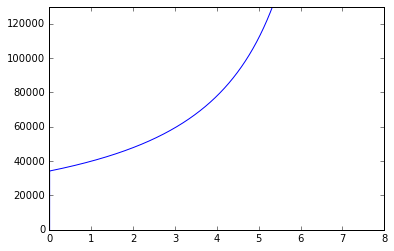

In [23]:
plt.plot(ts[1:].to(u.day),x)
plt.ylim(-0.1,13e4)

In [229]:
#3a
R=1.*u.solRad
L=1e5*u.solLum
M=1.*u.solMass

def Mdot(M, L):
    vesc=(np.sqrt(2*G*M/R)).to(u.km/u.s)
    vt=vesc/2.6
    Mdot=10**(-1.37)*((L/u.solLum)/1e6)**2.07*vt/(u.km/u.s)*(R/u.solRad)**0.5
    return Mdot*u.solMass/u.yr

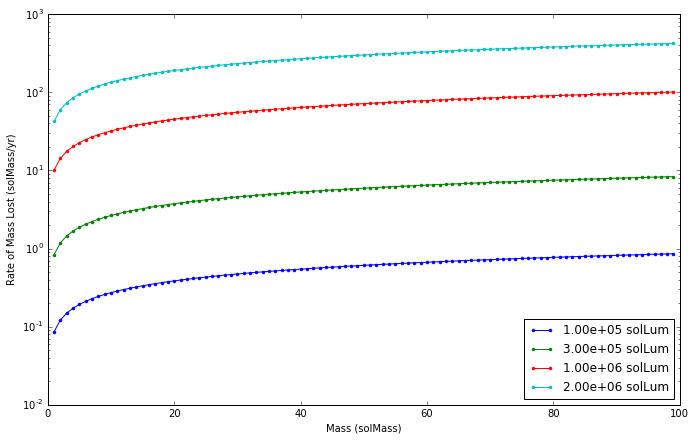

In [276]:
M=np.arange(1.,1e2,1)*u.solMass
Ls=[1e5,3e5,1e6,2e6]*u.solLum
s=7
fig=plt.subplots(figsize=(1.61803398875*s,s))
for i in Ls:
    plt.plot(M,Mdot(M,i),label="{0:.2e}".format(i),marker='.')
plt.legend(loc='best')
plt.xlabel('Mass (solMass)')
plt.ylabel('Rate of Mass Lost (solMass/yr)')
plt.yscale('log')

In [243]:
#3b
def Mdot2(M, L):
    gamma=0.3*(u.cm**2/u.g)*L/(4*np.pi*c*G*M)
    vesc=(np.sqrt(2*(1-gamma)*G*M/R)).to(u.km/u.s)
    vt=vesc/2.6
    Mdot=10**(-1.37)*((L/u.solLum)/1e6)**2.07*vt/(u.km/u.s)*(R/u.solRad)**0.5
    return Mdot*u.solMass/u.yr
Mdot2(1*u.solMass,1.*u.solLum)

<Quantity 3.853911869589046e-12 solMass / yr>

(0.01, 1000.0)

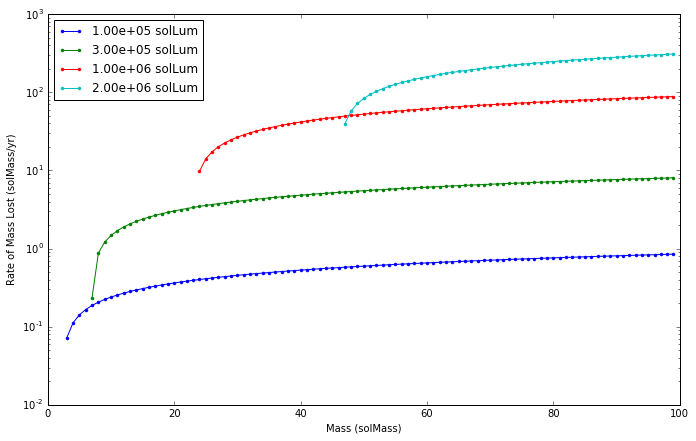

In [277]:
M=np.arange(1.,1e2,1)*u.solMass
Ls=[1e5,3e5,1e6,2e6]*u.solLum
s=7
fig=plt.subplots(figsize=(1.61803398875*s,s))
for i in Ls:
    plt.plot(M,Mdot2(M,i),label="{0:.2e}".format(i),marker='.');
plt.legend(loc='best')
plt.yscale('log')
plt.xlabel('Mass (solMass)')
plt.ylabel('Rate of Mass Lost (solMass/yr)')
plt.ylim(1e-2,1e3)

In [70]:
#4b
a=(5./2./(4.*np.pi*G)*(3/np.pi)**(2./3)*h**2/(20.*m_e*m_p**(5./3)))**0.5*3.6536
(a/R_earth*(1e6*u.g/u.cm**3)**(-1./6)*2.**(-5./6)).decompose()

<Quantity 1.7478396618998961>

In [73]:
#4b
a=4.*np.pi*(5./2./(4.*np.pi*G)*(3/np.pi)**(2./3)*h**2/(20.*m_e*m_p**(5./3)))**(3./2)*3.6536**2*0.203
a.decompose()
(a/M_sun*(1e6*u.g/u.cm**3)**(1./2)*2.**(-5./2)).decompose()

<Quantity 0.4863113240420159>

In [76]:
0.49/1.75**-3.

2.62609375

In [79]:
#4c
a=(1./(np.pi*G)*(3./np.pi)**(1./3)*h*c/(8*m_p**(4./3)))**0.5*6.90
a.decompose()
(a/R_earth*(1e6*u.g/u.cm**3)**(-1./3)*2.**(-2./3)).decompose()

<Quantity 5.223110806777122>

In [80]:
a=4.*np.pi*(1./(np.pi*G)*(3/np.pi)**(1./3)*h*c/(8*m_p**(4./3)))**(3./2)*6.90**2*0.042
a.decompose()
(a/M_sun*2.**-2.).decompose()

<Quantity 1.421747556717544>

In [64]:
x=((3/np.pi)**(2./3)*h**2/(20.*m_e*m_p**(5./3))).decompose()
x.unit.to_system(u.cgs)

[Unit("1e+06 cm4 / (g(2/3) s2)")]

In [245]:
#5a
rho0=3.79e6*u.g/u.cm**3
Knr=1e13*u.cm**4/u.g**(2./3)/u.s**2
x=4*np.pi*G*rho0**(1./3)/Knr*2.**(5./3)
((x.decompose())**-0.5).to(u.cm)

<Quantity 155206167.3654624 cm>

In [317]:
#5c
from scipy.integrate import odeint
from scipy.integrate import simps

In [505]:
def f(y,s):
    Thetai=y[0]
    Vi=y[1]
    B=5./3.*Thetai**(-1./3.)*(1.+Thetai**(2./3.))**(-1./2.)-1./3.*Thetai**(1./3.)*(1.+Thetai**(2./3.))**(-3./2.)
    C=-5./9.*Thetai**(-4./3.)*(1.+Thetai**(2./3.))**(-1./2.)-2./3.*Thetai**(-2./3.)*(1.+Thetai**(2./3.))**(-3./2.)+1./3.*(1.+Thetai**(2./3.))**(-5./2.)
    f0=Vi
    f1=-(2./s)*Vi-(C/B)*Vi**2.-(1./B)*Thetai
    return [f0,f1]

In [544]:
rhoi=np.linspace(4,12,17)
rhoc=10**(rhoi)
Thetac=rhoc/3.79e6
#Thetac

In [545]:
Thetas=[]
Vs=[]

for Theta0 in Thetac: 
    V0 = 0    
    y0 = [Theta0, V0]
    s  = np.linspace(0.0001, 100., 100000)
    #s  = np.logspace(np.log10(0.0001), np.log10(10.), 5000)
    soln = odeint(f, y0, s)
    Thetas.append(soln[:,0])
    Vs.append(soln[:,1])

In [546]:
#np.where(np.isfinite(Thetas[15]))
X=[item[np.where(item/Thetac[i] > 1e-3)] for i, item in enumerate(Thetas)]

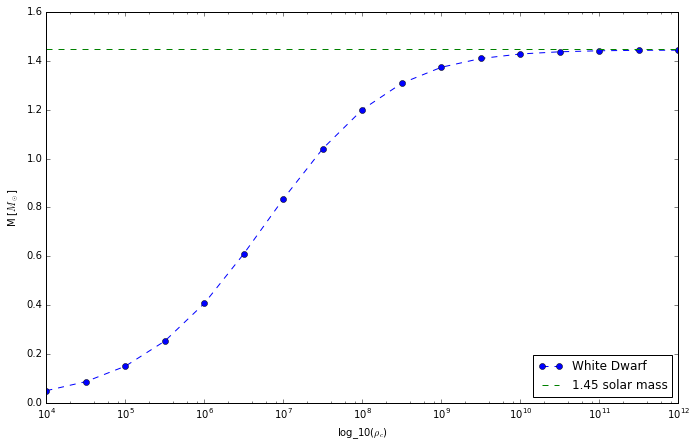

In [547]:
Is=[]
for item in X:
    x = s[:len(item)]
    y1 = item*(x**2)
    Is.append(simps(y1, x))
M=np.array(Is)*0.09
b=7
fig=plt.subplots(figsize=(1.61803398875*b,b))

plt.plot(rhoc,M,'o--',label='White Dwarf')
plt.plot([1e4,1e12],[1.45,1.45],'--',label='1.45 solar mass')
plt.xlabel(r'log_10($\rho_c$)')
plt.ylabel(r'M [$M_\odot$]')
plt.xscale('log')
plt.legend(loc='best')

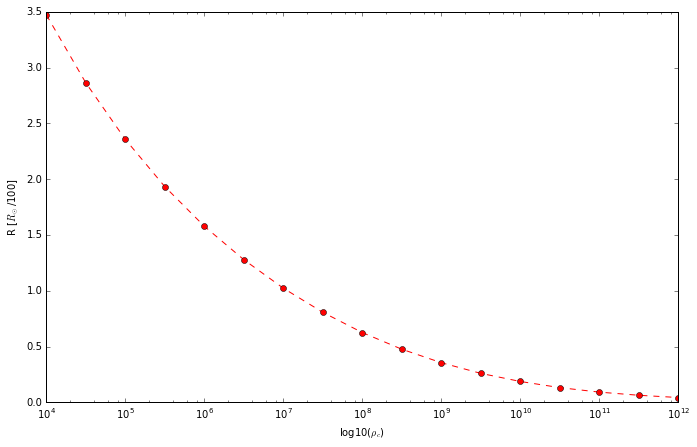

In [481]:
Rs=[]
for item in X:
    Rs.append(s[len(item)-1])
b=7
fig=plt.subplots(figsize=(1.61803398875*b,b))
y=(np.array(Rs)*1.557e8*u.cm/u.solRad*100.).decompose()
plt.plot(rhoc,y,'o--',color='red')
plt.xlabel(r'log10($\rho_c$)')
plt.ylabel(r'R [$R_\odot$/100]')
plt.xscale('log')

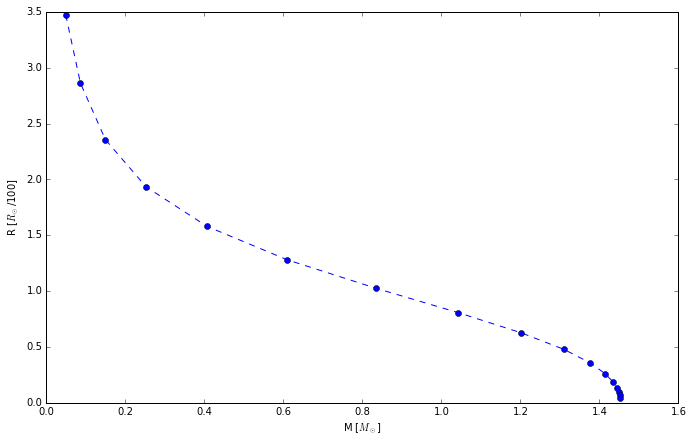

In [482]:
b=7
fig=plt.subplots(figsize=(1.61803398875*b,b))
plt.plot(np.array(Is)*0.09,(np.array(Rs)*1.557e8*u.cm/u.solRad*100.).decompose(),'o--')
plt.xlabel(r'M [$M_\odot$]')
plt.ylabel(r'R [$R_\odot$/100]')

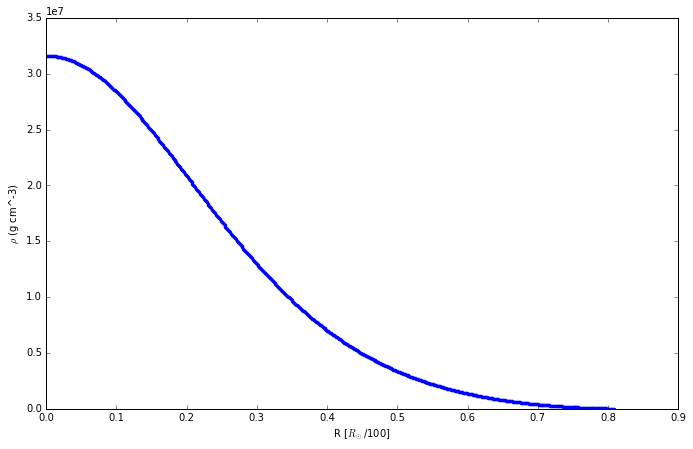

In [501]:
#(np.array(Is)*0.09)[7] M=M_sun
rho0=3.79e6*u.g/u.cm**3
a=1.557e8*u.cm
x=(s*a/u.solRad*100.).decompose()
rho_sun=(M_sun/(4./3*np.pi*R_sun**3)).decompose()
y=(Thetas[7]*rho0)
b=7
fig=plt.subplots(figsize=(1.61803398875*b,b))
plt.plot(x,y,marker='.',label='%i'% i)
plt.ylabel(r'$\rho$ (g cm^-3)')
plt.xlabel(r'R [$R_\odot$/100]')
#plt.yscale('log')
#plt.xscale('log')
#plt.ylim(1e-4,1e5)

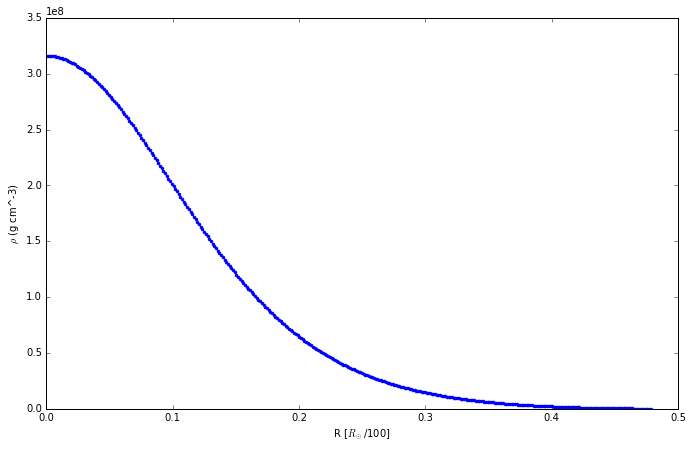

In [502]:
#[9] M=1.3M_sun
rho0=3.79e6*u.g/u.cm**3
a=1.557e8*u.cm
x=(s*a/u.solRad*100.).decompose()
rho_sun=(M_sun/(4./3*np.pi*R_sun**3)).decompose()
y=(Thetas[9]*rho0)
b=7
fig=plt.subplots(figsize=(1.61803398875*b,b))
plt.plot(x,y,marker='.',label='%i'% i)
plt.ylabel(r'$\rho$ (g cm^-3)')
plt.xlabel(r'R [$R_\odot$/100]')

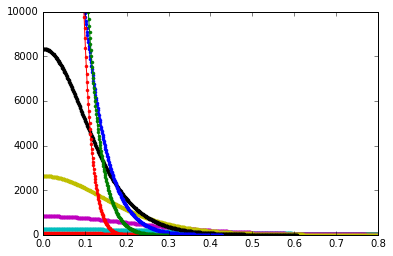

In [551]:
for i, Theta in enumerate(Thetas):
    plt.plot(s,Theta,marker='.',label='%i'% i)
    #plt.yscale('log')
    #plt.xscale('log')
    plt.ylim(1e-4,1e4)
    plt.xlim(0.,0.8)
#plt.plot(s,V,label='V',marker='.')
    #plt.legend(loc='best')

In [ ]:
c=[i for i in Theta if np.isfinite(i)]
d=[i for i in V if np.isfinite(i)]
ss=s[:len(c)]

In [ ]:
x = ss[:1]
y1 = X[16]*x**2
I1 = simps(y1, x)

In [ ]:
I1**0.09

<hr>

In [12]:
#8.311 2a
n=2.
ref = lambda i:(n**2*np.cos(i)-np.sqrt(n**2-np.sin(i)**2))/(n**2*np.cos(i)+np.sqrt(n**2-np.sin(i)**2))
tran = lambda i:(2*n*np.cos(i))/(n**2*np.cos(i)+np.sqrt(n**2-np.sin(i)**2))

(0, 1.5707963267948966)

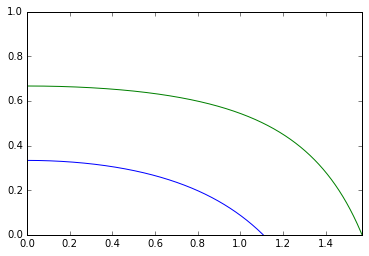

In [24]:
I=np.arange(0,np.pi,0.0001)
#print I
plt.plot(I,ref(I))
plt.plot(I,tran(I),color='g')
#plt.plot(I,tran(I)-ref(I),color='r')
plt.ylim(0,1)
plt.xlim(0,np.pi/2)

In [27]:
ref2=lambda i: (np.cos(i)-np.sqrt(n**2-np.sin(i)**2))/(np.cos(i)+np.sqrt(n**2-np.sin(i)**2))
tran2=lambda i: (2*np.cos(i))/(np.cos(i)+np.sqrt(n**2-np.sin(i)**2))

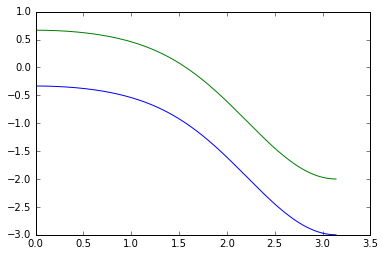

In [28]:
I=np.arange(0,np.pi,0.001)
#print I
plt.plot(I,ref2(I))
plt.plot(I,tran2(I),color='g')
#plt.ylim(-1.5,1.5)
#plt.xlim(1.9,2.1)